In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time


In [2]:
df = pd.read_csv('/Users/galvanize/Documents/capstone2/DATA/listings.csv.gz')

In [3]:
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,38585,https://www.airbnb.com/rooms/38585,20200529020107,2020-06-04,Charming Victorian home - twin beds + breakfast,Per the City Council of Asheville. Due to the ...,"Charming room with 2 twin size beds, furnished...",Per the City Council of Asheville. Due to the ...,none,Our North Asheville neighborhood stretches alo...,...,f,f,moderate,t,t,1,0,1,0,1.18
1,80905,https://www.airbnb.com/rooms/80905,20200529020107,2020-06-04,French Chic Loft,Let yourself melt into the delectable décor of...,Have you ever gazed at dreamy photos in a maga...,Let yourself melt into the delectable décor of...,none,"Quiet, tucked away from the hustle and bustle ...",...,t,f,super_strict_60,f,f,11,11,0,0,1.01
2,108061,https://www.airbnb.com/rooms/108061,20200529020107,2020-06-04,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,True Asheville...artist styled apartment with ...,Walk to town in ten minutes! Monthly rental in...,none,"I love my neighborhood! Its friendly, easy-goi...",...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.84
3,155305,https://www.airbnb.com/rooms/155305,20200529020107,2020-05-29,Cottage! BonPaul + Sharky's Hostel,NaN,Private cottage located behind the main house ...,Private cottage located behind the main house ...,none,"We are within easy walk of pubs, breweries, mu...",...,t,f,moderate,f,f,7,1,2,4,2.23
4,156805,https://www.airbnb.com/rooms/156805,20200529020107,2020-05-29,"Private Room ""Ader"" at BPS Hostel",NaN,Private Rooms at Bon Paul and Sharky's Hostel....,Private Rooms at Bon Paul and Sharky's Hostel....,none,"Easy walk to pubs, cafes, bakery, breweries, l...",...,t,f,moderate,f,f,7,1,2,4,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,43473737,https://www.airbnb.com/rooms/43473737,20200529020107,2020-06-04,Peace of Paradise,New construction apartment over detached garag...,NaN,New construction apartment over detached garag...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,4.00
2383,43495845,https://www.airbnb.com/rooms/43495845,20200529020107,2020-06-04,Luxury Downtown Asheville Condo with Mountain ...,Stay in the center of Asheville. Walk to resta...,NaN,Stay in the center of Asheville. Walk to resta...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,9,9,0,0,NaN
2384,43509635,https://www.airbnb.com/rooms/43509635,20200529020107,2020-06-04,Monthly furnished rental - Walk to town !,MONTHLY Corporate or vacation home! This is a ...,Entire house,MONTHLY Corporate or vacation home! This is a ...,none,"Off Charlotte street, you can walk to the Hist...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN
2385,43525648,https://www.airbnb.com/rooms/43525648,20200529020107,2020-06-04,"Close to Downtown, Secluded, Hot Tub, WiFi, Pe...","Location, Location, Fantastic Location! 2 Bed...","This pet friendly log cabin is clean, cozy and...","Location, Location, Fantastic Location! 2 Bed...",none,NaN,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


In [4]:
df_part1 = df.iloc[:,0:27]
df_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2387 non-null   int64  
 1   listing_url            2387 non-null   object 
 2   scrape_id              2387 non-null   int64  
 3   last_scraped           2387 non-null   object 
 4   name                   2387 non-null   object 
 5   summary                2373 non-null   object 
 6   space                  2108 non-null   object 
 7   description            2384 non-null   object 
 8   experiences_offered    2387 non-null   object 
 9   neighborhood_overview  1919 non-null   object 
 10  notes                  1428 non-null   object 
 11  transit                1739 non-null   object 
 12  access                 1718 non-null   object 
 13  interaction            1918 non-null   object 
 14  house_rules            1823 non-null   object 
 15  thum

In [5]:
df_part1

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate
0,38585,https://www.airbnb.com/rooms/38585,20200529020107,2020-06-04,Charming Victorian home - twin beds + breakfast,Per the City Council of Asheville. Due to the ...,"Charming room with 2 twin size beds, furnished...",Per the City Council of Asheville. Due to the ...,none,Our North Asheville neighborhood stretches alo...,...,https://a0.muscache.com/im/pictures/216165/755...,NaN,165529,https://www.airbnb.com/users/show/165529,Evelyne,2010-07-13,"Asheville, North Carolina, United States","(Hidden by Airbnb) Likes:\r\nDancing, Horse Ri...",NaN,NaN
1,80905,https://www.airbnb.com/rooms/80905,20200529020107,2020-06-04,French Chic Loft,Let yourself melt into the delectable décor of...,Have you ever gazed at dreamy photos in a maga...,Let yourself melt into the delectable décor of...,none,"Quiet, tucked away from the hustle and bustle ...",...,https://a0.muscache.com/im/pictures/29807425/6...,NaN,427027,https://www.airbnb.com/users/show/427027,Celeste,2011-03-07,"Asheville, North Carolina, United States",Locally-owned and operated Asheville Stay offe...,within an hour,100%
2,108061,https://www.airbnb.com/rooms/108061,20200529020107,2020-06-04,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,True Asheville...artist styled apartment with ...,Walk to town in ten minutes! Monthly rental in...,none,"I love my neighborhood! Its friendly, easy-goi...",...,https://z0.muscache.cn/im/pictures/41011975/0c...,NaN,320564,https://www.airbnb.com/users/show/320564,Lisa,2010-12-16,"Asheville, North Carolina, United States",I am a long time resident of Asheville and am ...,within an hour,100%
3,155305,https://www.airbnb.com/rooms/155305,20200529020107,2020-05-29,Cottage! BonPaul + Sharky's Hostel,NaN,Private cottage located behind the main house ...,Private cottage located behind the main house ...,none,"We are within easy walk of pubs, breweries, mu...",...,https://a0.muscache.com/im/pictures/8880711/cf...,NaN,746673,https://www.airbnb.com/users/show/746673,BonPaul,2011-06-26,"Asheville, North Carolina, United States",We operate two traveler's hostels located in H...,within an hour,100%
4,156805,https://www.airbnb.com/rooms/156805,20200529020107,2020-05-29,"Private Room ""Ader"" at BPS Hostel",NaN,Private Rooms at Bon Paul and Sharky's Hostel....,Private Rooms at Bon Paul and Sharky's Hostel....,none,"Easy walk to pubs, cafes, bakery, breweries, l...",...,https://a0.muscache.com/im/pictures/23447d55-f...,NaN,746673,https://www.airbnb.com/users/show/746673,BonPaul,2011-06-26,"Asheville, North Carolina, United States",We operate two traveler's hostels located in H...,within an hour,100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,43473737,https://www.airbnb.com/rooms/43473737,20200529020107,2020-06-04,Peace of Paradise,New construction apartment over detached garag...,NaN,New construction apartment over detached garag...,none,NaN,...,https://a0.muscache.com/im/pictures/064579cf-c...,NaN,43901986,https://www.airbnb.com/users/show/43901986,Bridget,2015-09-10,"Greenville, South Carolina, United States",I moved to Asheville three years ago because I...,within an hour,100%
2383,43495845,https://www.airbnb.com/rooms/43495845,20200529020107,2020-06-04,Luxury Downtown Asheville Condo with Mountain ...,Stay in the center of Asheville. Walk to resta...,NaN,Stay in the center of Asheville. Walk to resta...,none,NaN,...,https://a0.muscache.com/im/pictures/2c4465f8-b...,NaN,343440528,https://www.airbnb.com/users/show/343440528,Ben,2020-04-08,US,NaN,within an hour,83%
2384,43509635,https://www.airbnb.com/rooms/43509635,20200529020107,2020-06-04,Monthly furnished rental - Walk to town !,MONTHLY Corporate or vacation home! This is

In [6]:
df_part1 = df_part1.drop(['listing_url', 'scrape_id', 'xl_picture_url','thumbnail_url','medium_url'], axis=1)

In [7]:
df_part1

,id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate
0,38585,2020-06-04,Charming Victorian home - twin beds + breakfast,Per the City Council of Asheville. Due to the ...,"Charming room with 2 twin size beds, furnished...",Per the City Council of Asheville. Due to the ...,none,Our North Asheville neighborhood stretches alo...,I can lend you a yoga mat or you can go to our...,"You need a car, but UBER and Lyft are availabl...",...,This list is based on previous experiences: * ...,https://a0.muscache.com/im/pictures/216165/755...,165529,https://www.airbnb.com/users/show/165529,Evelyne,2010-07-13,"Asheville, North Carolina, United States","(Hidden by Airbnb) Likes:\r\nDancing, Horse Ri...",NaN,NaN
1,80905,2020-06-04,French Chic Loft,Let yourself melt into the delectable décor of...,Have you ever gazed at dreamy photos in a maga...,Let yourself melt into the delectable décor of...,none,"Quiet, tucked away from the hustle and bustle ...",there is Apple TV not cable TV (there is no op...,Park your car and walk anywhere and everywhere...,...,THE GUEST WHO BOOKS AGREES TO: • Be present at...,https://a0.muscache.com/im/pictures/29807425/6...,427027,https://www.airbnb.com/users/show/427027,Celeste,2011-03-07,"Asheville, North Carolina, United States",Locally-owned and operated Asheville Stay offe...,within an hour,100%
2,108061,2020-06-04,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,True Asheville...artist styled apartment with ...,Walk to town in ten minutes! Monthly rental in...,none,"I love my neighborhood! Its friendly, easy-goi...",NaN,You can walk and bike anywhere from here but i...,...,"This is a peaceful friendly neighborhood so, k...",https://z0.muscache.cn/im/pictures/41011975/0c...,320564,https://www.airbnb.com/users/show/320564,Lisa,2010-12-16,"Asheville, North Carolina, United States",I am a long time resident of Asheville and am ...,within an hour,100%
3,155305,2020-05-29,Cottage! BonPaul + Sharky's Hostel,NaN,Private cottage located behind the main house ...,Private cottage located behind the main house ...,none,"We are within easy walk of pubs, breweries, mu...",Parking in our lot is limited. You can also pa...,There is a bus that picks up a block away that...,...,7 day maximum stay. Please no outside linens....,https://a0.muscache.com/im/pictures/8880711/cf...,746673,https://www.airbnb.com/users/show/746673,BonPaul,2011-06-26,"Asheville, North Carolina, United States",We operate two traveler's hostels located in H...,within an hour,100%
4,156805,2020-05-29,"Private Room ""Ader"" at BPS Hostel",NaN,Private Rooms at Bon Paul and Sharky's Hostel....,Private Rooms at Bon Paul and Sharky's Hostel....,none,"Easy walk to pubs, cafes, bakery, breweries, l...",NaN,The bus picks up one block away for $1,...,"Guests must have ID, No Locals, No drugs, No L...",https://a0.muscache.com/im/pictures/23447d55-f...,746673,https://www.airbnb.com/users/show/746673,BonPaul,2011-06-26,"Asheville, North Carolina, United States",We operate two traveler's hostels located in H...,within an hour,100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,43473737,2020-06-04,Peace of Paradise,New construction apartment over detached garag...,NaN,New construction apartment over detached garag...,none,NaN,NaN,NaN,...,NaN,https://a0.muscache.com/im/pictures/064579cf-c...,43901986,https://www.airbnb.com/users/show/43901986,Bridget,2015-09-10,"Greenville, South Carolina, United States",I moved to Asheville three years ago because I...,within an hour,100%
2383,43495845,2020-06-04,Luxury Downtown Asheville Condo with Mountain ...,Stay in the center of Asheville. Walk to resta...,NaN,Stay in the center of Asheville. Walk to resta...,none,NaN,NaN,NaN,...,NaN,https://a0.muscache.com/im/pic

In [8]:
hosts = df_part1[['host_id', 'host_name','host_location','host_since', 'host_about']]
hosts

,host_id,host_name,host_location,host_since,host_about
0,165529,Evelyne,"Asheville, North Carolina, United States",2010-07-13,"(Hidden by Airbnb) Likes:\r\nDancing, Horse Ri..."
1,427027,Celeste,"Asheville, North Carolina, United States",2011-03-07,Locally-owned and operated Asheville Stay offe...
2,320564,Lisa,"Asheville, North Carolina, United States",2010-12-16,I am a long time resident of Asheville and am ...
3,746673,BonPaul,"Asheville, North Carolina, United States",2011-06-26,We operate two traveler's hostels located in H...
4,746673,BonPaul,"Asheville, North Carolina, United States",2011-06-26,We operate two traveler's hostels located in H...
...,...,...,...,...,...
2382,43901986,Bridget,"Greenville, South Carolina, United States",2015-09-10,I moved to Asheville three years ago because I...
2383,343440528,Ben,US,2020-04-08,NaN
2384,347052146,Bird,"Asheville, North Carolina, United States",2020-05-21,Monthly rental only -
2385,1767483,Becky,US,2012-02-17,NaN


In [9]:
type(hosts['host_since'])
hosts['host_since2'] = pd.to_datetime(hosts['host_since'], format= '%Y-%m-%d')
# #hosts['host_since'] = A
# #hosts['host_since']
# type(hosts['host_since'])


/Users/galvanize/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
hosts['host_id'] =  hosts['host_id'].astype('str')

/Users/galvanize/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
hosts = hosts.drop('host_since', axis=1)
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_id        2387 non-null   object        
 1   host_name      2387 non-null   object        
 2   host_location  2386 non-null   object        
 3   host_about     1682 non-null   object        
 4   host_since2    2387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 93.4+ KB


In [12]:
hosts['host_since'] =  hosts['host_since2']

hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_id        2387 non-null   object        
 1   host_name      2387 non-null   object        
 2   host_location  2386 non-null   object        
 3   host_about     1682 non-null   object        
 4   host_since2    2387 non-null   datetime64[ns]
 5   host_since     2387 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 112.0+ KB


In [13]:
hosts = hosts.drop('host_since2', axis=1)
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_id        2387 non-null   object        
 1   host_name      2387 non-null   object        
 2   host_location  2386 non-null   object        
 3   host_about     1682 non-null   object        
 4   host_since     2387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 93.4+ KB


In [14]:
# listings_by_name = pd.DataFrame(hosts['host_name'].value_counts())

# listings_by_name.reset_index(inplace=True)


#listings_by_name.index

In [43]:
# listings_by_name.rename(columns={listings_by_name.index.name:'host_name'})
# listings_by_name

In [16]:
# listings_by_name.rename(columns={'host_name':'listings_count'},inplace=True)
# listings_by_name.rename(columns={'index':'host_name'}, inplace=True)


In [44]:
# listings_by_name


In [18]:
# listings_by_name.head(50)

In [19]:
listings_by_hostid = pd.DataFrame(hosts['host_id'].value_counts())
listings_by_hostid

,host_id
167186184,54
149601167,30
96187307,24
3665372,23
134903005,19
...,...
36948751,1
20156554,1
94891912,1
103466318,1


In [20]:
listings_by_hostid.reset_index(inplace=True)
listings_by_hostid

,index,host_id
0,167186184,54
1,149601167,30
2,96187307,24
3,3665372,23
4,134903005,19
...,...,...
1644,36948751,1
1645,20156554,1
1646,94891912,1
1647,103466318,1


In [21]:
listings_by_hostid.rename(columns={'host_id':'listings_count'}, inplace=True)

In [27]:
listings_by_hostid.rename(columns={'index':'host_id'}, inplace=True)
listings_by_hostid

,host_id,listings_count
0,167186184,54
1,149601167,30
2,96187307,24
3,3665372,23
4,134903005,19
...,...,...
1644,36948751,1
1645,20156554,1
1646,94891912,1
1647,103466318,1


In [32]:
top_100_hosters = listings_by_hostid.head(100)
bottom_100_hosters = listings_by_hostid.tail(100)
single_listing_hosters = np.where(listings_by_hostid['listings_count']==1)

In [45]:
top_100_hosters
#bottom_100_hosters
#single_listing_hosters
#single_listing_hosters.values_counts()


,host_id,listings_count
0,167186184,54
1,149601167,30
2,96187307,24
3,3665372,23
4,134903005,19
...,...,...
95,4709573,3
96,32670355,3
97,42676282,3
98,158275564,3


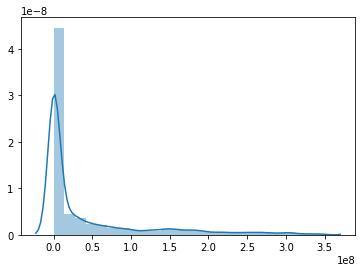

In [60]:
sns.distplot(listings_by_hostid, bins=25)
#sns.distplot(listings_by_name,bins=100, kde=False, norm_hist=True)


In [ ]:
# titanic = sns.load_dataset("titanic")
# g = sns.catplot("alive", col="deck", col_wrap=4,
#                 data=titanic[titanic.deck.notnull()],
#                 kind="count", height=2.5, aspect=.8)

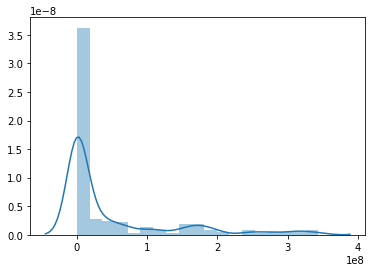

In [75]:
sns.distplot(top_100_hosters)

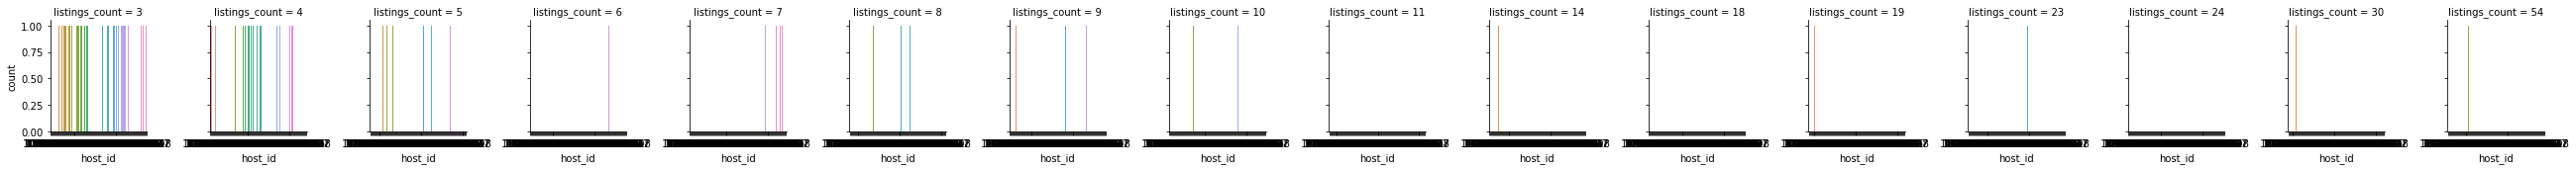

In [71]:
#sns.catplot('host_id', col='listings_count',  data=top_100_hosters[top_100_hosters.listings_count.notnull()], kind='count', height=2.5, aspect=.9)

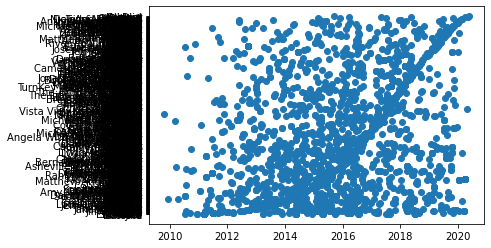

In [24]:
#host_date = hosts['host_since']

plt.plot_date(x=hosts['host_since'], y=hosts['host_name'])
plt.show()


In [25]:
#host_date = hosts['host_since']
#sns.barplot(x='host_id', y='host_since', color='k', alpha=0.7, data=hosts)

In [26]:
hosts.sort_values('host_since', ascending=True)

,host_id,host_name,host_location,host_about,host_since
2315,47859,James,"Charlotte, North Carolina, United States","Basic suburban dad. 2 kids, 2 dogs, 3 cats. ...",2009-10-23
587,62667,Heather,"Asheville, North Carolina, United States",My husband and I love to travel and explore ne...,2009-12-13
720,87397,Evan,"Asheville, North Carolina, United States",I am a young(ish) environmental scientist and ...,2010-03-02
1055,96130,Renee,"Asheville, North Carolina, United States","I'm a former nomad now settled in Asheville, N...",2010-03-19
212,106067,Heather,"Asheville, North Carolina, United States","Hobbies: *hiking*, !food!, READING, ((((hospit...",2010-04-09
...,...,...,...,...,...
2356,343440528,Ben,US,NaN,2020-04-08
2383,343440528,Ben,US,NaN,2020-04-08
2371,344807572,Richard,US,NaN,2020-04-27
2379,345787487,Alladin,US,NaN,2020-05-09


In [46]:
hosts['host_since'].max()

Timestamp('2020-05-21 00:00:00')

In [47]:
hosts['host_since'].min()

Timestamp('2009-10-23 00:00:00')